In [6]:
with open('miracle_in_the_andes.txt', encoding='utf-8') as file:
    book = file.read()

# The most used words (non-articles)

In [7]:
import re
pattern = re.compile("[a-zA-Z]+'*[a-zA-Z]*")
findings = re.findall(pattern, book.lower())

In [8]:
d = {}
for word in findings:
    if word in d:
        d[word] = d[word] + 1
    else:
        d[word] = 1

In [9]:
d_list = [(value, key) for (key, value) in d.items()]
d_list = sorted(d_list, reverse=True)
d_list[:5]

[(5346, 'the'), (2795, 'and'), (2729, 'i'), (2400, 'to'), (2060, 'of')]

In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\steph\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
from nltk.corpus import stopwords
english_stopwords = stopwords.words("english")
english_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [20]:
filtered_words = [(word, count) for (count,word) in d_list if word not in english_stopwords]

In [21]:
filtered_words

[('would', 575),
 ('us', 519),
 ('said', 292),
 ('roberto', 284),
 ('could', 252),
 ('one', 249),
 ('snow', 227),
 ('mountain', 183),
 ('time', 182),
 ('like', 165),
 ('way', 164),
 ('life', 161),
 ('knew', 155),
 ('mountains', 147),
 ('fuselage', 140),
 ('still', 137),
 ('felt', 127),
 ('father', 127),
 ('others', 126),
 ('found', 126),
 ('first', 121),
 ('saw', 117),
 ('plane', 116),
 ('see', 115),
 ('back', 115),
 ('never', 112),
 ('thought', 106),
 ('even', 106),
 ('night', 105),
 ('made', 104),
 ('moment', 103),
 ('know', 100),
 ('much', 97),
 ('began', 97),
 ('roy', 95),
 ('long', 95),
 ('feet', 93),
 ('mother', 92),
 ('crash', 92),
 ('climb', 91),
 ('god', 90),
 ('many', 89),
 ('make', 88),
 ('day', 88),
 ('around', 88),
 ('go', 85),
 ('seemed', 84),
 ('keep', 84),
 ('love', 83),
 ('left', 83),
 ('friends', 83),
 ('told', 80),
 ('hours', 80),
 ('andes', 79),
 ('two', 78),
 ('find', 78),
 ('away', 78),
 ('always', 78),
 ('think', 77),
 ('soon', 77),
 ('marcelo', 77),
 ('gustavo',

# Sentiment Analysis: What is the most positive and the most negative chapter?

In [26]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [27]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\steph\AppData\Roaming\nltk_data...


True

In [28]:
analyzer = SentimentIntensityAnalyzer()

In [30]:
scores = analyzer.polarity_scores("Hey, look how beautiful the trees are. I love them.")

In [31]:
if scores['pos'] > scores['neg']:
    print("It is a positive text")
else:
    print("This is a negative text")

It is a positive text


In [55]:
import re
pattern = re.compile("Chapter [0-9]+")
chapters = re.split(pattern, book)

In [56]:
chapters =  chapters[1:]
len(chapters)

10

In [57]:
scores = []
for num, chapter in enumerate(chapters):
    scores.append(analyzer.polarity_scores(chapter))
    print(num, scores)

0 [{'neg': 0.061, 'neu': 0.779, 'pos': 0.16, 'compound': 1.0}]
1 [{'neg': 0.061, 'neu': 0.779, 'pos': 0.16, 'compound': 1.0}, {'neg': 0.12, 'neu': 0.726, 'pos': 0.154, 'compound': 0.9991}]
2 [{'neg': 0.061, 'neu': 0.779, 'pos': 0.16, 'compound': 1.0}, {'neg': 0.12, 'neu': 0.726, 'pos': 0.154, 'compound': 0.9991}, {'neg': 0.145, 'neu': 0.751, 'pos': 0.105, 'compound': -0.9999}]
3 [{'neg': 0.061, 'neu': 0.779, 'pos': 0.16, 'compound': 1.0}, {'neg': 0.12, 'neu': 0.726, 'pos': 0.154, 'compound': 0.9991}, {'neg': 0.145, 'neu': 0.751, 'pos': 0.105, 'compound': -0.9999}, {'neg': 0.141, 'neu': 0.721, 'pos': 0.138, 'compound': -0.9963}]
4 [{'neg': 0.061, 'neu': 0.779, 'pos': 0.16, 'compound': 1.0}, {'neg': 0.12, 'neu': 0.726, 'pos': 0.154, 'compound': 0.9991}, {'neg': 0.145, 'neu': 0.751, 'pos': 0.105, 'compound': -0.9999}, {'neg': 0.141, 'neu': 0.721, 'pos': 0.138, 'compound': -0.9963}, {'neg': 0.118, 'neu': 0.742, 'pos': 0.141, 'compound': 0.9997}]
5 [{'neg': 0.061, 'neu': 0.779, 'pos': 0.16,

In [49]:
import pandas as pd

In [58]:
df = pd.DataFrame(scores)

In [59]:
df

,neg,neu,pos,compound
0,0.061,0.779,0.160,1.0000
1,0.120,0.726,0.154,0.9991
2,0.145,0.751,0.105,-0.9999
3,0.141,0.721,0.138,-0.9963
4,0.118,0.742,0.141,0.9997
5,0.124,0.761,0.115,-0.9979
6,0.136,0.761,0.103,-0.9999
7,0.120,0.786,0.094,-0.9998
8,0.097,0.824,0.079,-0.9996
9,0.086,0.733,0.181,1.0000


<Axes: >

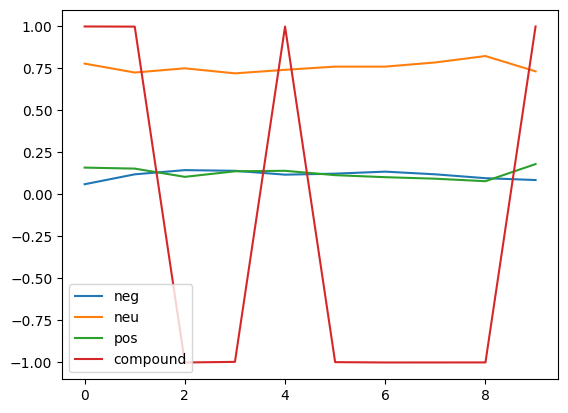

In [60]:
df.plot()